In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from sklearn import metrics

# Upload Dataset

In [88]:
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# EDA

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [90]:
df.shape

(10841, 13)

In [91]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [92]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [93]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [94]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Cleaning Data

In [95]:
# Dropping the unused columns
col = ['App','Current Ver','Android Ver']
df.drop(columns=col, axis=1, inplace=True)

In [96]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [97]:
# To convert Reviews we need to handel one row that has this value '3.0M'
df[df['Reviews']== '3.0M']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [98]:
df.drop(10472,inplace=True)

df["Reviews"] = df["Reviews"].astype(int)


In [99]:
df.dtypes

Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

In [100]:
# Handling Install column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [101]:
# Remove any unwanted strings 
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '').astype(int)

C:\Users\U.S.E.R\AppData\Local\Temp\ipykernel_4160\2950251258.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [102]:
# Handling Prince column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [103]:
# Remove any unwanted strings 
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(float)

C:\Users\U.S.E.R\AppData\Local\Temp\ipykernel_4160\1828649399.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [104]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  int32         
 3   Size            10840 non-null  object        
 4   Installs        10840 non-null  int32         
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(5)
memory usage: 846.9+ KB


In [106]:
# Is there any duplication ?
df.duplicated().sum()

492

In [107]:
# Drop any duplication
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [108]:
df.isnull().sum()

Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [109]:
# Handling NaN vaules
#Rating column
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
# Type
df['Type'].fillna(method='ffill',inplace=True)


In [110]:
# Checking
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [111]:
# Converting Rating to int
df['Rating']=df['Rating'].astype(int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10348 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10348 non-null  object        
 1   Rating          10348 non-null  int32         
 2   Reviews         10348 non-null  int32         
 3   Size            10348 non-null  object        
 4   Installs        10348 non-null  int32         
 5   Type            10348 non-null  object        
 6   Price           10348 non-null  float64       
 7   Content Rating  10348 non-null  object        
 8   Genres          10348 non-null  object        
 9   Last Updated    10348 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), object(5)
memory usage: 768.0+ KB


In [113]:
df.dtypes

Category                  object
Rating                     int32
Reviews                    int32
Size                      object
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
dtype: object

# Visualization

C:\Users\U.S.E.R\AppData\Local\Temp\ipykernel_4160\1075396966.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



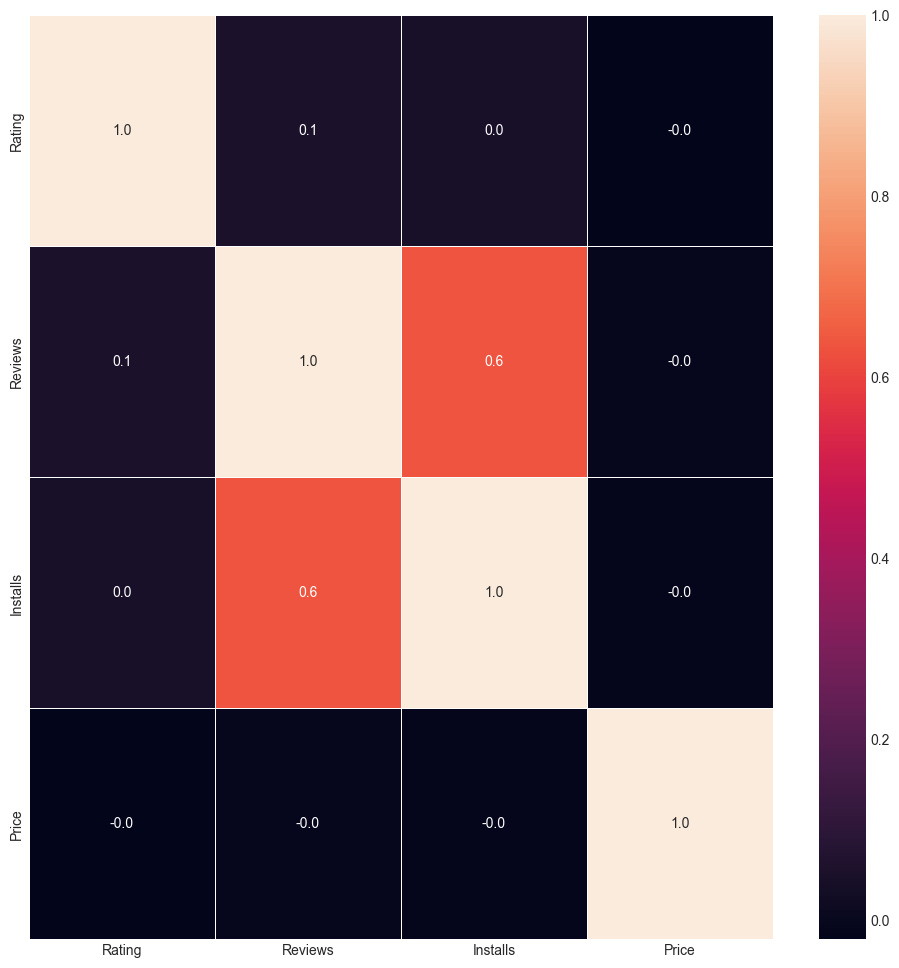

In [114]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [115]:
df['Category'].value_counts()

FAMILY                 1942
GAME                   1121
TOOLS                   843
BUSINESS                427
PRODUCTIVITY            407
MEDICAL                 405
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  347
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          123
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [116]:
# Number of each category
fig = px.histogram(df, x='Category')
fig.update_layout(
    xaxis=dict(tickangle=70),
    width=800,
    height=400
)
fig.show()


In [117]:
# Catagory vs Rating
fig = px.box(df.sort_values('Rating', ascending=False), y='Rating', x='Category')
fig.update_layout(
    xaxis=dict(tickangle=80),
    width=900,
    height=600
)
fig.show()

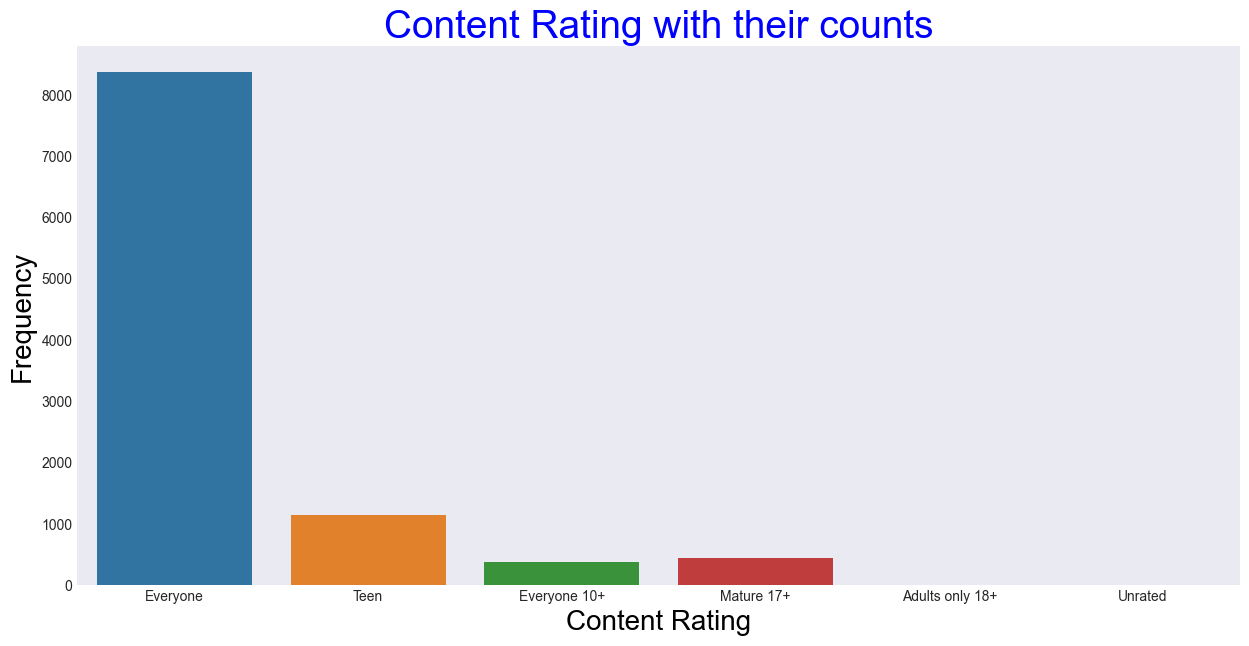

In [118]:
plt.figure(figsize=(15,7))

sns.countplot(x="Content Rating",data=df)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel("Content Rating",size=20,c="k")
plt.ylabel("Frequency",size=20,c="k")
plt.title("Content Rating with their counts",size=28,c="b")
plt.show()

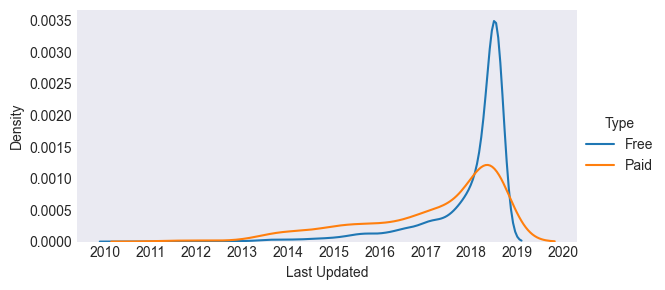

In [119]:
grid = sns.FacetGrid(df, hue="Type",aspect=2)
grid.map(sns.kdeplot, 'Last Updated')
grid.add_legend()

In [120]:
fig = px.scatter(df, x=df['Price'], y=df['Last Updated'], color="Type" )
fig.show()

In [121]:
fig = px.scatter(df, x=df['Reviews'], y=df['Rating'], color="Type" )
fig.show()

In [122]:
df2=df
df2['Type'] = df2['Type'].replace({0: 'Free', 1: 'Paid'})

labels = df2['Type'].value_counts(sort=True).index
sizes = df2['Type'].value_counts(sort=True)

fig = px.pie(df, values=sizes, names=labels, 
             labels={'names': 'Type', 'sizes': 'Count'},
             title='Total % of Free App in store')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



# Free apps are very much more than Paid apps
# 92% apps are free
# users always prefer to install free apps

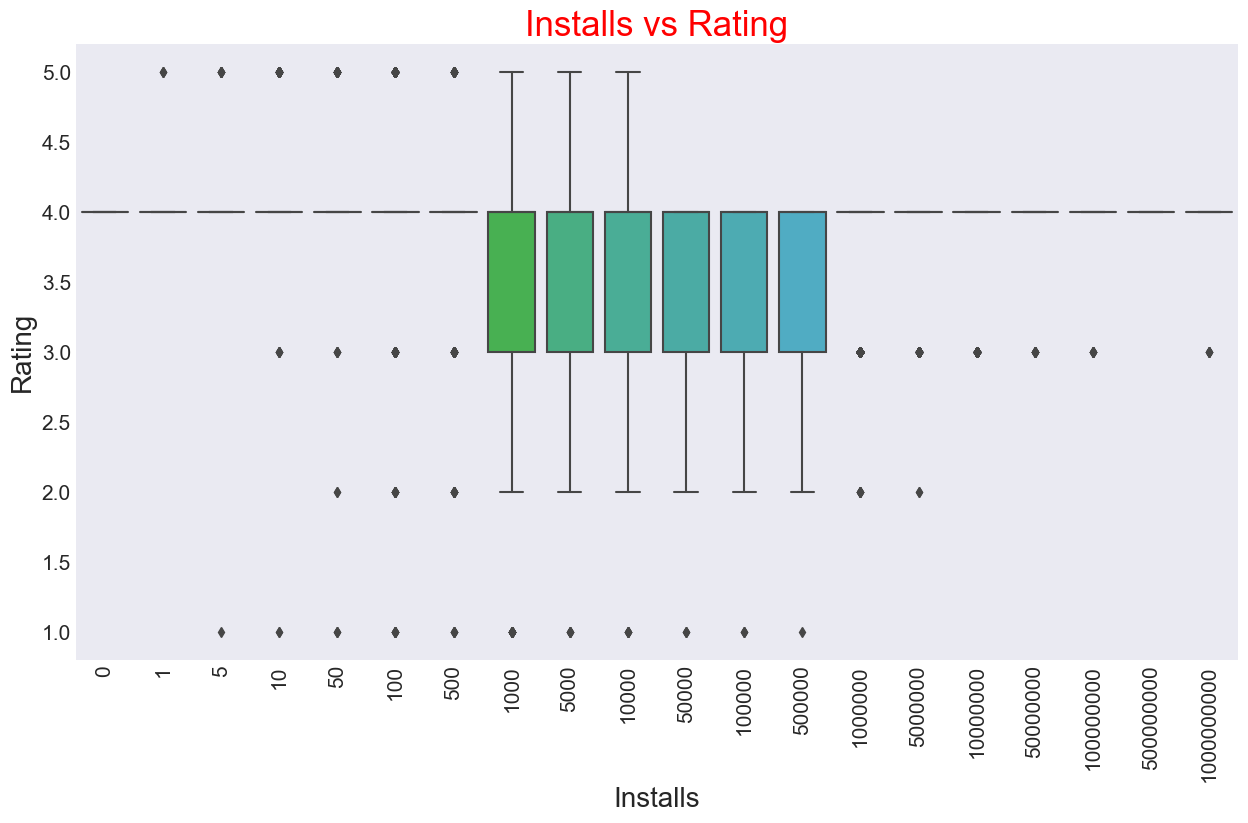

In [123]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(15,8))
sns.boxplot(x="Installs", y="Rating", data=df)
plt.title("Installs vs Rating",size=25,c="r")
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.xlabel("Installs",size=20)
plt.ylabel("Rating",size=20)
plt.show()

#avg rating of all apps is between 3 to 4.5 which is very good

Text(0.5, 1.0, 'Histogram of rating')

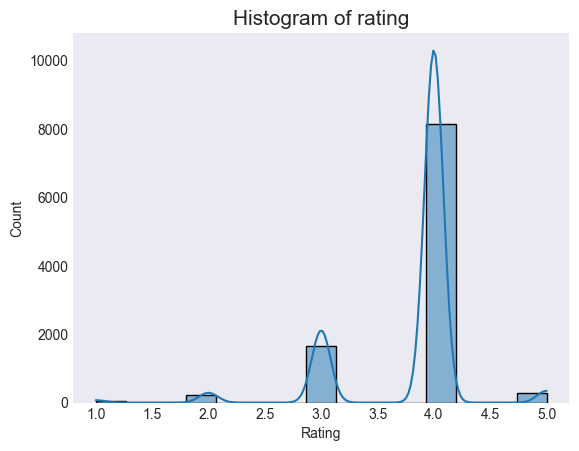

In [124]:
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram of rating", size=15,)

#   ___________________________________________________________________________________________________

# Machine Learning Algorithms

In [125]:
# The Type column has two values Paid and Free will change the values to 0 ,1 where 0 is free and 1 is paid.
df['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})

In [126]:
# Target selection
X = df[['Reviews', 'Installs','Type','Price']]
y = df['Rating']


In [127]:
# Splitting test & train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- #### Will first do the Logistic Regression model

In [130]:
lr_c=LogisticRegression(random_state=0, solver='lbfgs',max_iter=400)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('Accuracy of Logistic Regression Model: ', lr_ac)
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Accuracy of Logistic Regression Model:  0.7819868573637417
MAE: 0.2489369926555856
MSE: 0.31851565519907227
RMSE: 0.5643719121280508


Confusion Matrix for Logistic Regression Classifier 



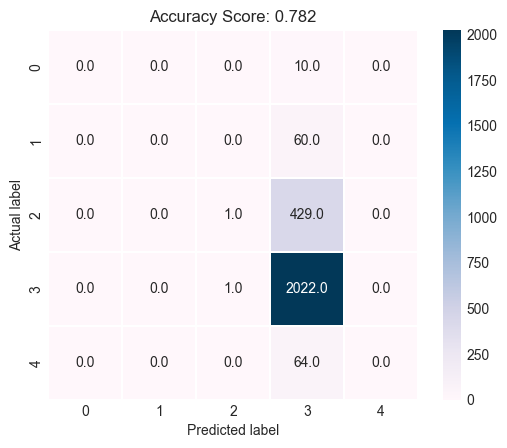

In [131]:
print("Confusion Matrix for Logistic Regression Classifier","\n")
score = round(accuracy_score(y_test, lr_pred),3) 
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

- #### Second  the Random Forest Classifier model

In [134]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_ac=accuracy_score(y_test, rdf_pred)
print('Accuracy of Random Forest: ', rdf_ac)
print('MAE:', metrics.mean_absolute_error(y_test, rdf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rdf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rdf_pred)))

Accuracy of Random Forest:  0.7251642829532277
MAE: 0.31001159644375725
MSE: 0.3911867027444917
RMSE: 0.6254492007705276


Confusion Matrix for Random Forest Classifier 



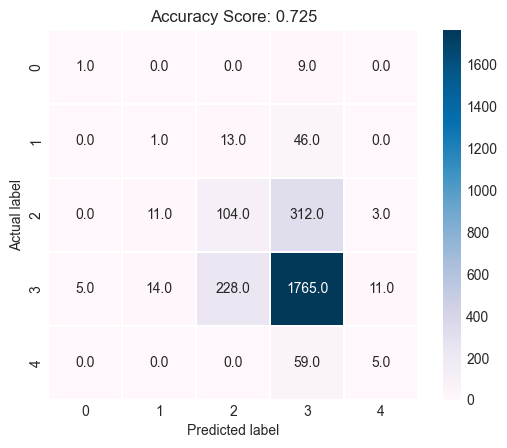

In [135]:
print("Confusion Matrix for Random Forest Classifier","\n")
score = round(accuracy_score(y_test, rdf_pred),3) 
cm1 = confusion_matrix(y_test, rdf_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

- ## Compare the two models

C:\Users\U.S.E.R\AppData\Local\Temp\ipykernel_4160\3110721666.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



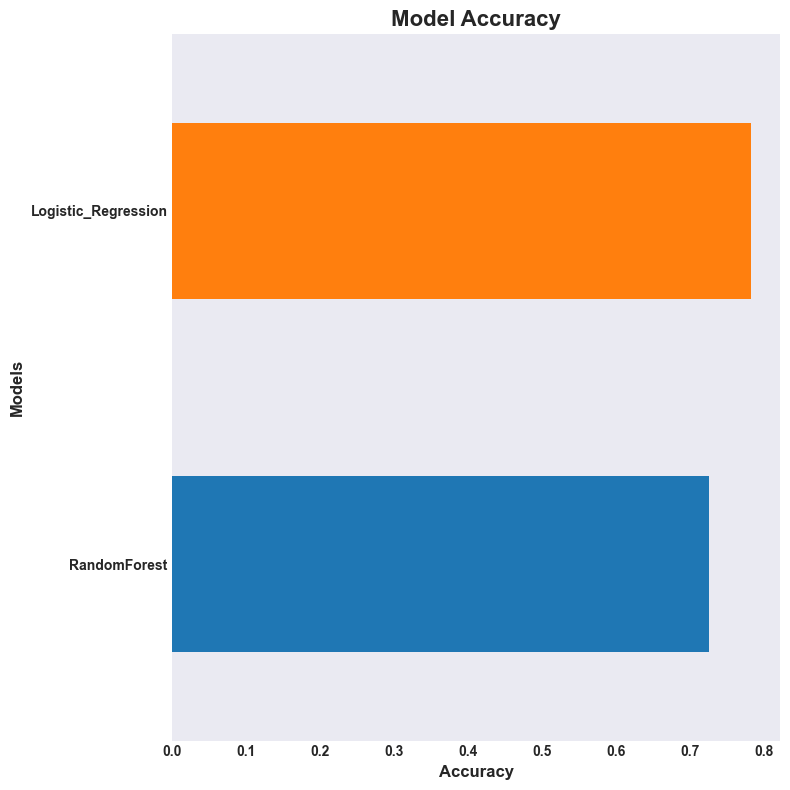

In [136]:
model_accuracy = pd.Series(data=[lr_ac, rdf_ac], 
        index=['Logistic_Regression','RandomForest'])

# Set the color palette
colors = sns.color_palette("tab10")

# Set the style
plt.style.use('seaborn-dark')

# Bar chart for model accuracy
plt.figure(figsize=(8, 8))
model_accuracy.sort_values().plot.barh(color=colors)
plt.title('Model Accuracy', fontweight='bold', fontsize=16)
plt.xlabel('Accuracy', fontweight='bold', fontsize=12)
plt.ylabel('Models', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

In [137]:
# model comparison
models = ['Logistic Regression', 'Random Forest']
accuracy_scores = [lr_ac, rdf_ac]
mae_scores = [metrics.mean_absolute_error(y_test, lr_pred), metrics.mean_absolute_error(y_test, rdf_pred)]
mse_scores = [metrics.mean_squared_error(y_test, lr_pred), metrics.mean_squared_error(y_test, rdf_pred)]
rmse_scores = [np.sqrt(metrics.mean_squared_error(y_test, lr_pred)), np.sqrt(metrics.mean_squared_error(y_test, rdf_pred))]


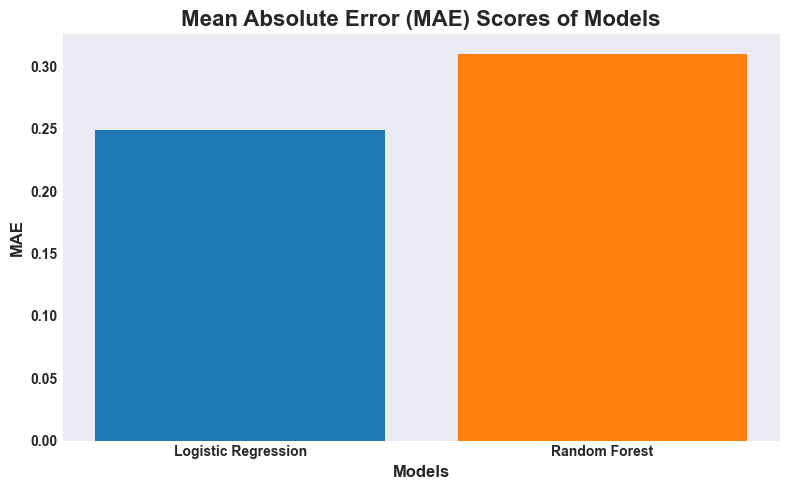

In [138]:

# Bar chart for MAE scores
plt.figure(figsize=(8, 5))
plt.bar(models, mae_scores, color=colors)
plt.title('Mean Absolute Error (MAE) Scores of Models', fontweight='bold', fontsize=16)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('MAE', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()



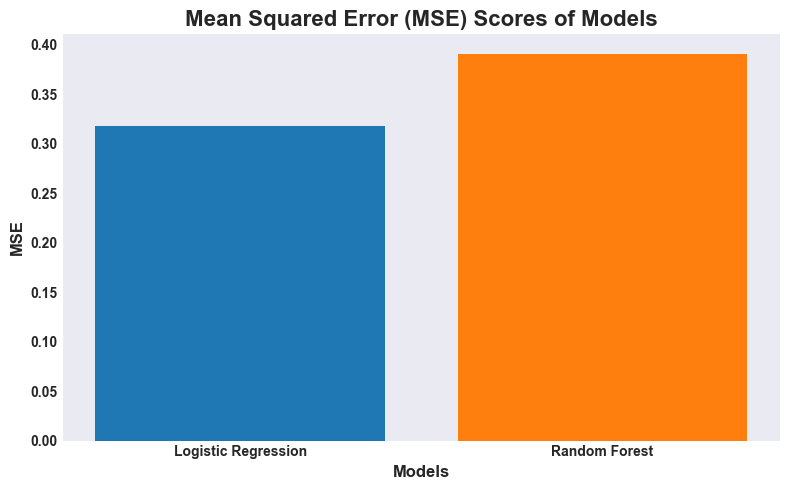

In [139]:
# Bar chart for MSE scores
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color=colors)
plt.title('Mean Squared Error (MSE) Scores of Models', fontweight='bold', fontsize=16)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('MSE', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


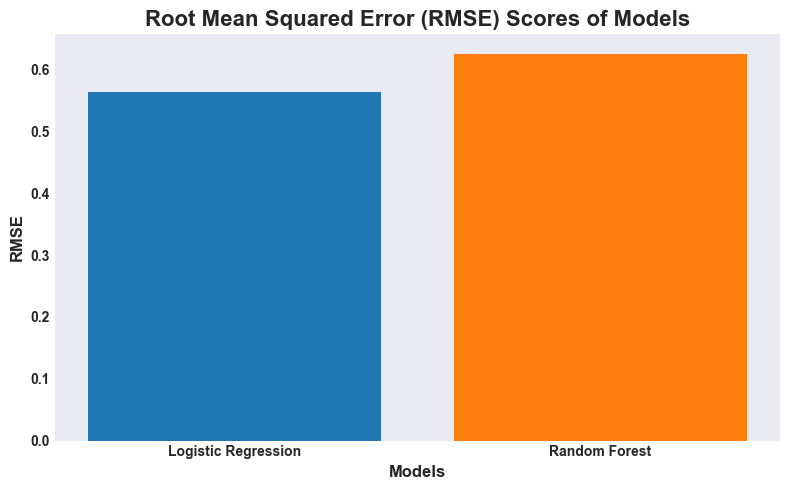

In [140]:
# Bar chart for RMSE scores
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_scores, color=colors)
plt.title('Root Mean Squared Error (RMSE) Scores of Models', fontweight='bold', fontsize=16)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('RMSE', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

<AxesSubplot: >

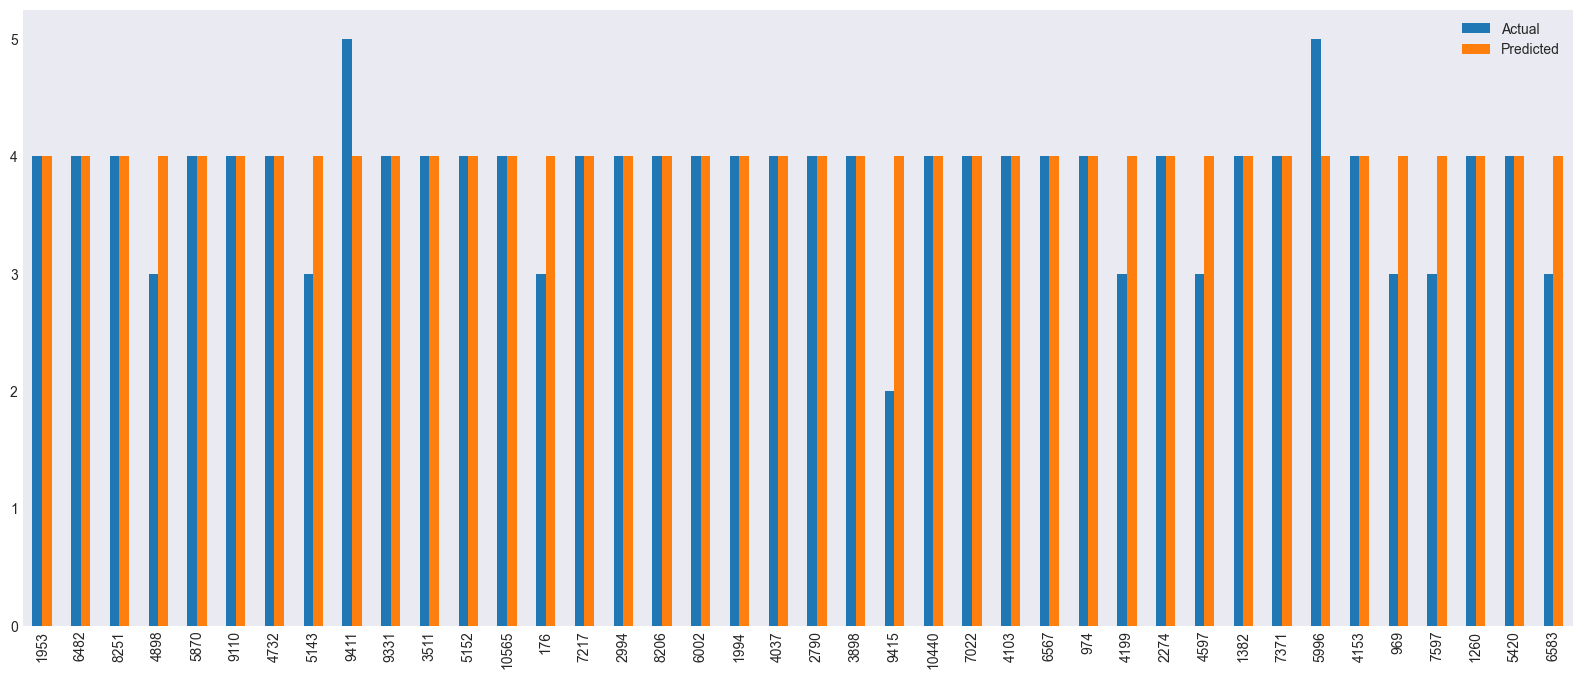

In [141]:
# RandomForestClassifier
dfRF = pd.DataFrame({'Actual': y_test, 'Predicted': rdf_pred})
dfReg2[:40].plot(kind = "bar", figsize = (20,8))

<AxesSubplot: >

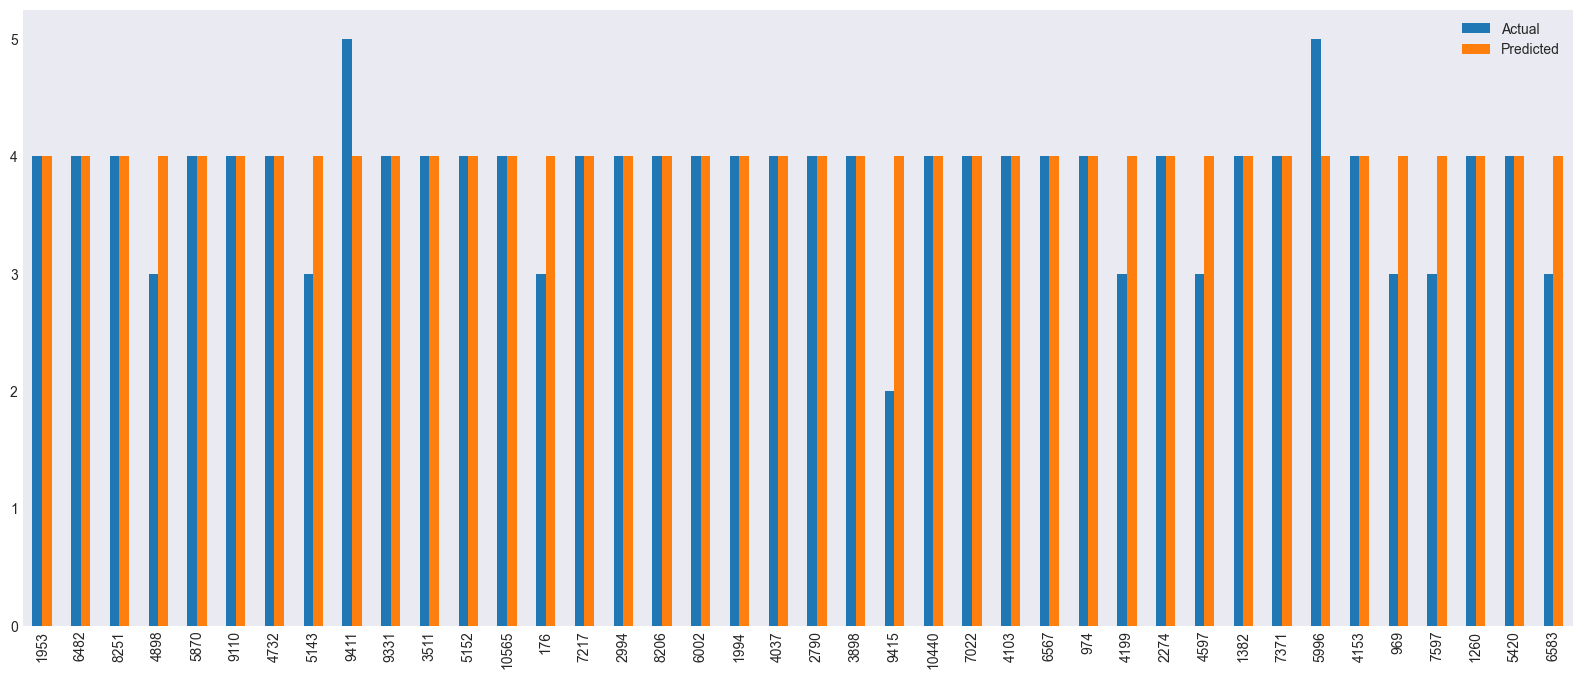

In [142]:
# Logistic Regression
dfReg2 = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})

dfReg2[:40].plot(kind = "bar", figsize = (20,8))

## Final Conclusion and Recommendations

The following conclusions can be taken from the evaluation of the logistic regression and random forest models:

- With an accuracy of 78%, the logistic regression model surpassed the random forest model, which had an accuracy of 72%.
- When compared to the random forest model, the logistic regression model has lower mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). These findings indicate that the logistic regression model fits the given dataset better and can generate more accurate predictions for the target variable.